In [1]:
import os 
import pandas as pd
import numpy as np

In [9]:
file_config_map = {
    "pipeline_results_1node_8cpu.csv": "1-node-8cpu",
    "pipeline_results_1node_16cpu.csv": "1-node-16cpu",
    "pipeline_results_local.csv": "local",         
    "pipeline_results_2nodes_8+8cpu.csv": "2-node",   
    "pipeline_results_3nodes_8+8+8cpu.csv": "3-node"          
}

In [18]:
# node1_8cpu = pd.read_csv(r"C:\Users\reeda\Downloads\pipeline_results_1node_8cpu.csv")
# node1_16cpu= pd.read_csv(r"C:\Users\reeda\Downloads\pipeline_results_1node_16cpu.csv")
# node2_8x2cpu = pd.read_csv(r"C:\Users\reeda\Downloads\pipeline_results_2nodes_8+8cpu.csv")
# node3_8x3cpu = pd.read_csv(r"C:\Users\reeda\Downloads\pipeline_results_3nodes_8+8+8cpu.csv")
# local = pd.read_csv(r"C:\Users\reeda\Downloads\pipeline_results_local.csv")


df_list = []
for file, label in file_config_map.items():
    try:
        temp_df = pd.read_csv(r"C:\Users\reeda\Downloads\{}".format(file))
        temp_df["config"] = label
        df_list.append(temp_df)
    except FileNotFoundError:
        print(f"{file} not found. Skipping...")

df_combined = pd.concat(df_list, ignore_index=True)

# Compute average metrics per configuration
metrics = ["total_time", "t_ingest", "t_bronze", "t_silver", "t_gold", 
           "cpu_bronze", "cpu_silver", "cpu_gold", 
           "mem_bronze", "mem_silver", "mem_gold",
           "write_bronze", "write_silver", "write_gold"]
df_avg = df_combined.groupby("config")[metrics].mean().reset_index()

df_avg

,config,total_time,t_ingest,t_bronze,t_silver,t_gold,cpu_bronze,cpu_silver,cpu_gold,mem_bronze,mem_silver,mem_gold,write_bronze,write_silver,write_gold
0,1-node-16cpu,283.779333,0.060940,51.637924,58.787034,173.292441,40.795641,75.227778,86.656522,20.970256,21.102222,21.060870,1046.933203,561.463802,4719.618880
1,1-node-8cpu,381.026333,0.051866,43.679257,79.547295,257.746527,60.709744,89.557778,95.017391,37.029103,37.356667,36.856522,669.933333,758.310807,5075.506250
2,2-node,354.964000,0.050397,40.032726,76.691854,238.187858,57.464359,88.664444,95.108696,38.934359,39.271111,39.134783,676.343099,736.649609,5005.441667
3,3-node,387.735333,0.024647,43.291887,80.825132,263.592540,58.123718,87.801111,94.987500,45.133205,45.483333,45.312500,707.886719,747.079297,5456.830208
4,local,321.142000,0.450737,39.021642,88.542664,193.115562,40.317308,78.747778,86.303333,46.042436,46.606667,44.910000,780.481510,927.609635,8810.935938


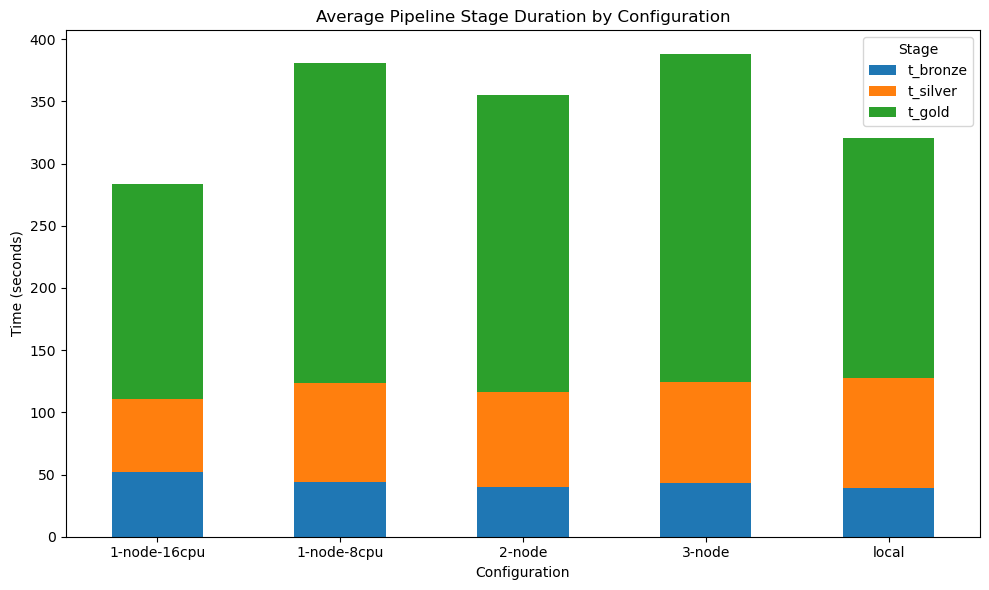

In [13]:
import matplotlib.pyplot as plt
stage_columns = ["t_bronze", "t_silver", "t_gold"]
df_avg.set_index("config")[stage_columns].plot(
    kind="bar", 
    stacked=True,
    figsize=(10, 6)
)

plt.title("Average Pipeline Stage Duration by Configuration")
plt.ylabel("Time (seconds)")
plt.xlabel("Configuration")
plt.xticks(rotation=0)
plt.legend(title="Stage")
plt.tight_layout()
plt.show()

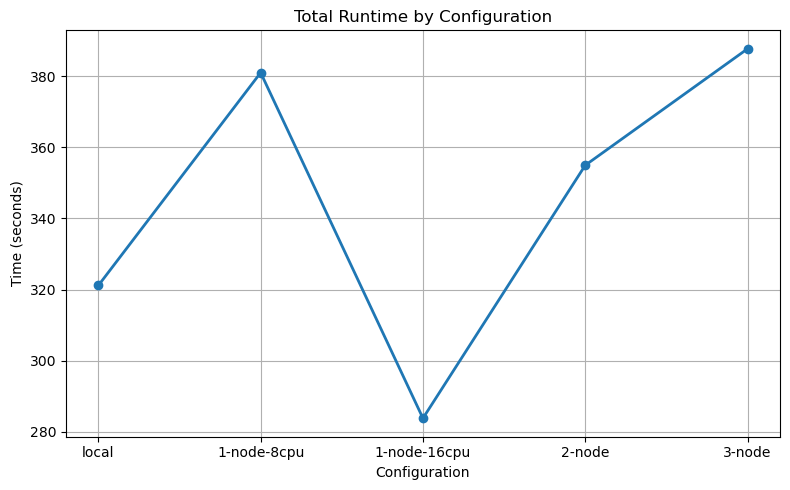

In [14]:
config_order = ["local", "1-node-8cpu", "1-node-16cpu", "2-node", "3-node"]
df_avg["config"] = pd.Categorical(df_avg["config"], categories=config_order, ordered=True)
df_avg = df_avg.sort_values("config")

# Plot total runtime as a line chart
plt.figure(figsize=(8, 5))
plt.plot(df_avg["config"], df_avg["total_time"], marker='o', linewidth=2)

plt.title("Total Runtime by Configuration")
plt.ylabel("Time (seconds)")
plt.xlabel("Configuration")
plt.grid(True)
plt.tight_layout()
plt.show()

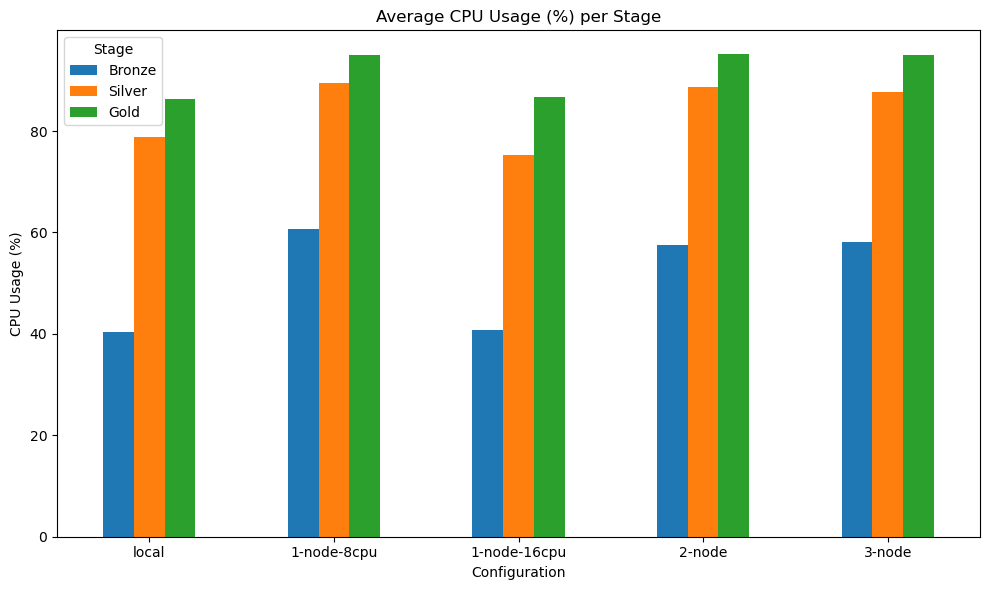

In [15]:
cpu_cols = ["cpu_bronze", "cpu_silver", "cpu_gold"]
df_avg_cpu = df_avg[["config"] + cpu_cols].set_index("config")

# Rename columns for prettier labels
df_avg_cpu.columns = ["Bronze", "Silver", "Gold"]

# Plot
df_avg_cpu.plot(kind="bar", figsize=(10, 6))
plt.title("Average CPU Usage (%) per Stage")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Configuration")
plt.xticks(rotation=0)
plt.legend(title="Stage")
plt.tight_layout()
plt.show()

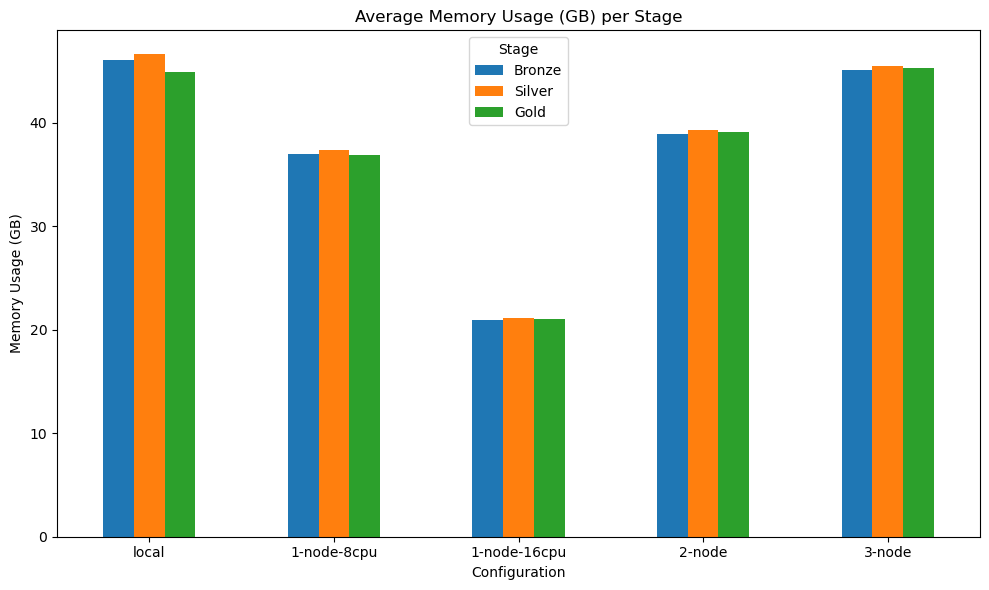

In [16]:
mem_cols = ["mem_bronze", "mem_silver", "mem_gold"]
df_avg_mem = df_avg[["config"] + mem_cols].set_index("config")
df_avg_mem.columns = ["Bronze", "Silver", "Gold"]

df_avg_mem.plot(kind="bar", figsize=(10, 6))
plt.title("Average Memory Usage (GB) per Stage")
plt.ylabel("Memory Usage (GB)")
plt.xlabel("Configuration")
plt.xticks(rotation=0)
plt.legend(title="Stage")
plt.tight_layout()
plt.show()

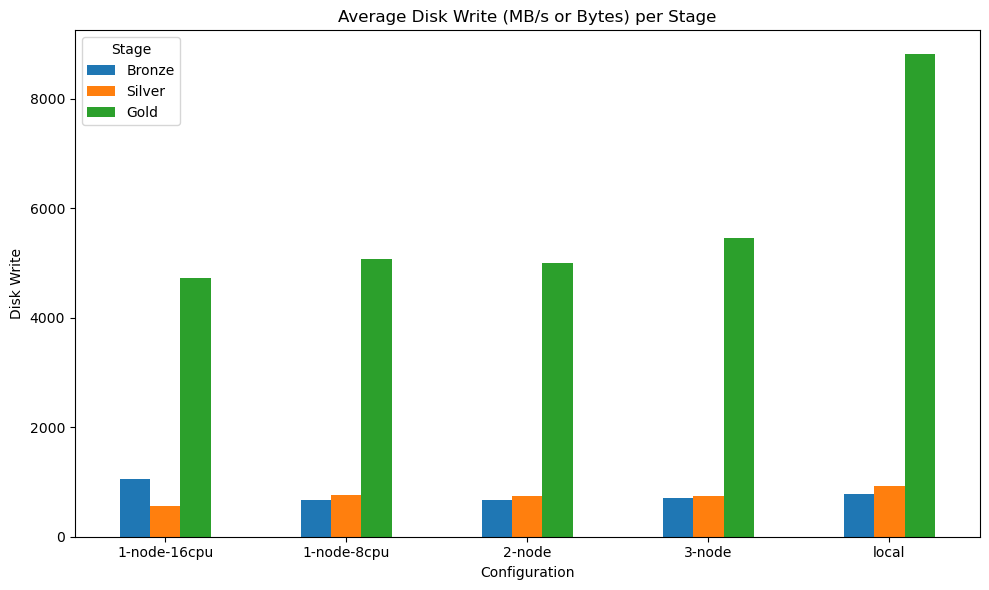

In [19]:
write_cols = ["write_bronze", "write_silver", "write_gold"]
df_avg_write = df_avg[["config"] + write_cols].set_index("config")
df_avg_write.columns = ["Bronze", "Silver", "Gold"]

df_avg_write.plot(kind="bar", figsize=(10, 6))
plt.title("Average Disk Write (MB/s or Bytes) per Stage")
plt.ylabel("Disk Write")
plt.xlabel("Configuration")
plt.xticks(rotation=0)
plt.legend(title="Stage")
plt.tight_layout()
plt.show()